# Python version of codes in doing data science
As doing data science is using R as code example, I would like to try to complete it using python.

## Here is for 2.2.2 Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import math

In [2]:
# Read in data
data1 = pd.read_csv("./data/dds_datasets/dds_ch2_nyt/nyt1.csv")
data1.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [3]:
# Create column name 'agecat', cataloge age in different chunks.
infinite = -math.inf
finite = math.inf
bin = [infinite, 0, 18, 24, 34, 44, 54, 64, finite]
categoried = pd.cut(data1['Age'], bins=bin)
data1['agecat'] = categoried
data1.head()

,Age,Gender,Impressions,Clicks,Signed_In,agecat
0,36,0,3,0,1,"(34, 44]"
1,73,1,3,0,1,"(64, inf]"
2,30,0,3,0,1,"(24, 34]"
3,49,1,3,0,1,"(44, 54]"
4,47,1,11,0,1,"(44, 54]"


In [4]:
# Get length, min, mean, max
data1[data1.agecat == '(64, inf]'].Age.describe()

count    28753.000000
mean        72.988697
std          6.075884
min         65.000000
25%         68.000000
50%         72.000000
75%         76.000000
max        108.000000
Name: Age, dtype: float64

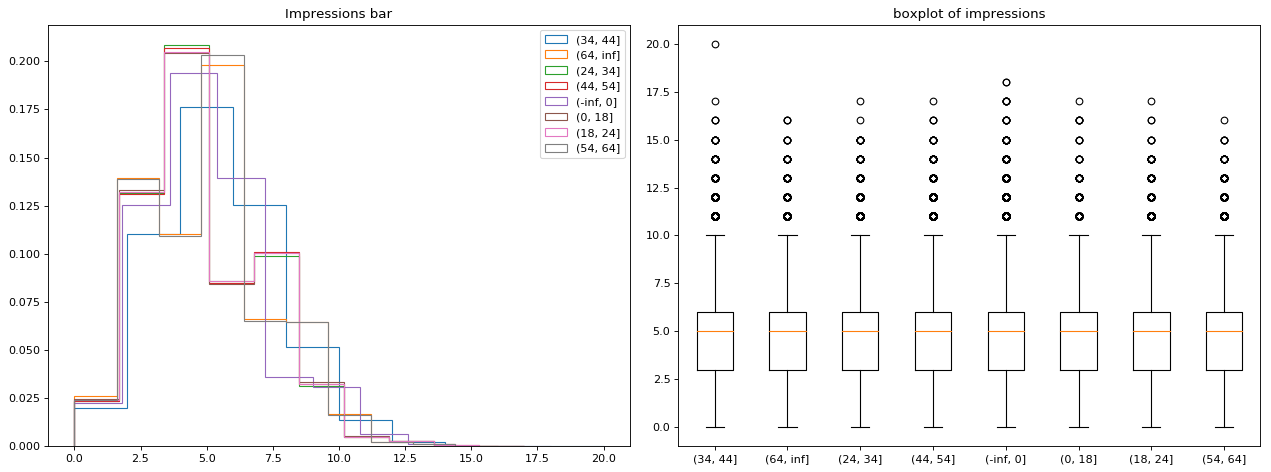

In [5]:
# Plot
fig, axes = plt.subplots(figsize=(16,6),dpi=80, nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

for x in list(categoried.unique()):
    ax0.hist(data1[data1.agecat == x].Impressions, 10, normed=1, histtype='step', stacked=True)
# ax0.hist(data1.Impressions, 10, normed=1, histtype='bar', stacked=True)
ax0.set_title('Impressions bar')
ax0.legend(list(categoried.unique()))

data_to_plot = []
for x in list(categoried.unique()):
    data_to_plot.append(data1[data1.agecat == x].Impressions)
ax1.boxplot(data_to_plot)
ax1.set_xticklabels(list(categoried.unique()))
ax1.set_title('boxplot of impressions')

fig.tight_layout()
plt.show()

In [6]:
# Chunk impression into has impression or not
imp_bin = [infinite, 0, finite]
imp_categoried = pd.cut(data1['Impressions'], bins=imp_bin)
data1['hasimps'] = imp_categoried
data1.head()

,Age,Gender,Impressions,Clicks,Signed_In,agecat,hasimps
0,36,0,3,0,1,"(34, 44]","(0, inf]"
1,73,1,3,0,1,"(64, inf]","(0, inf]"
2,30,0,3,0,1,"(24, 34]","(0, inf]"
3,49,1,3,0,1,"(44, 54]","(0, inf]"
4,47,1,11,0,1,"(44, 54]","(0, inf]"


In [7]:
data1[data1.hasimps == '(0, inf]'].Clicks.describe()

count    455375.000000
mean          0.093218
std           0.310922
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Clicks, dtype: float64

In [10]:
# from scipy.stats import gaussian_kde
import seaborn as sns

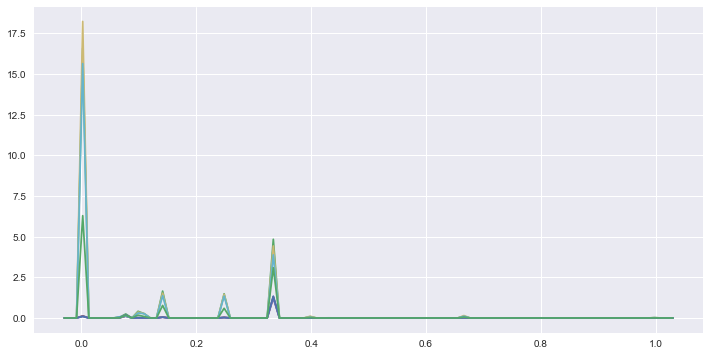

In [30]:
# sns.kdeplot(data1.Clicks / data1.Impressions, bw=0.5)
ctr = []
for x in list(categoried.unique()):
    ctr.append((data1[data1.agecat == x].Clicks / data1[data1.agecat == x].Impressions).fillna(0))
# ctr = data1.Clicks / data1.Impressions
# ctr = ctr.fillna(0)
f, ax = plt.subplots(figsize=(12, 6))
for i in ctr:
    ax = sns.kdeplot(i, bw=0.01)
ax.legend(list(categoried.unique()))
plt.show()